Hola **Jonathan**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto final operador de telecomunicaciones Interconnet

## Descripción de la tarea

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.


## Importando librerías

In [43]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
print("Librerías importadas")

Librerías importadas


## Importando datos

In [44]:
contract = pd.read_csv ('/datasets/final_provider/contract.csv')
personal = pd.read_csv ('/datasets/final_provider/personal.csv')
internet = pd.read_csv ('/datasets/final_provider/internet.csv')
phone = pd.read_csv ('/datasets/final_provider/phone.csv')
print("Datos importados correctamente")

Datos importados correctamente


### EDA

**Información del dataframe Contract**

In [45]:
print(contract.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


In [46]:
print(contract.sample(5))

      customerID   BeginDate              EndDate            Type  \
5596  5982-XMDEX  2014-09-01                   No        Two year   
5107  9633-DENPU  2016-03-01                   No  Month-to-month   
1799  9172-ANCRX  2019-03-01  2020-01-01 00:00:00  Month-to-month   
3898  2332-TODQS  2016-02-01                   No        One year   
1612  3092-IGHWF  2014-06-01  2020-01-01 00:00:00        One year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
5596               No  Bank transfer (automatic)           26.50      1698.55  
5107              Yes  Bank transfer (automatic)           58.60       2723.4  
1799              Yes           Electronic check           98.70       973.25  
3898               No    Credit card (automatic)           25.05       1171.5  
1612               No           Electronic check           87.40       5918.8  


**Información del dataframe Personal**

In [47]:
print(personal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


In [48]:
print(personal.sample(5))

      customerID  gender  SeniorCitizen Partner Dependents
5218  2923-ARZLG    Male              0     Yes        Yes
1593  0620-XEFWH    Male              0     Yes        Yes
3214  0549-CYCQN    Male              1      No         No
6688  0064-SUDOG  Female              0     Yes        Yes
2061  4958-GZWIY    Male              0     Yes        Yes


**Información del dataframe Internet**

In [49]:
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


In [50]:
print(internet.sample(5))

      customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
1747  8378-LKJAF     Fiber optic             No           No              Yes   
4351  6629-CZTTH             DSL             No           No               No   
3580  1069-XAIEM     Fiber optic             No           No               No   
2861  2259-OUUSZ             DSL             No           No              Yes   
4310  1976-CFOCS             DSL             No           No               No   

     TechSupport StreamingTV StreamingMovies  
1747          No         Yes             Yes  
4351          No          No             Yes  
3580          No          No             Yes  
2861         Yes          No              No  
4310          No          No              No  


**Información del dataframe Phone**

In [51]:
print(phone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


In [52]:
print(phone.sample(5))

      customerID MultipleLines
3193  3785-KTYSH           Yes
5131  1576-PFZIW            No
3659  5863-OOKCL            No
3858  2157-MXBJS           Yes
4940  0580-PIQHM           Yes


### Validando registros duplicados en cada dataframe

In [53]:
print("Registros duplicados en contract:", contract.duplicated().sum())
print("Registros duplicados en personal:", personal.duplicated().sum())
print("Registros duplicados en internet:", internet.duplicated().sum())
print("Registros duplicados en phone:", phone.duplicated().sum())

Registros duplicados en contract: 0
Registros duplicados en personal: 0
Registros duplicados en internet: 0
Registros duplicados en phone: 0


### Valores nulos

In [54]:
print("Valores nulos en contract: \n", contract.isnull().sum())

Valores nulos en contract: 
 customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [55]:
print("Valores nulos en personal: \n", personal.isnull().sum())

Valores nulos en personal: 
 customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64


In [56]:
print("Valores nulos en internet: \n", internet.isnull().sum())

Valores nulos en internet: 
 customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


In [57]:
print("Valores nulos en phone: \n", phone.isnull().sum())

Valores nulos en phone: 
 customerID       0
MultipleLines    0
dtype: int64


## Gráficas

**Tipos de contratos**

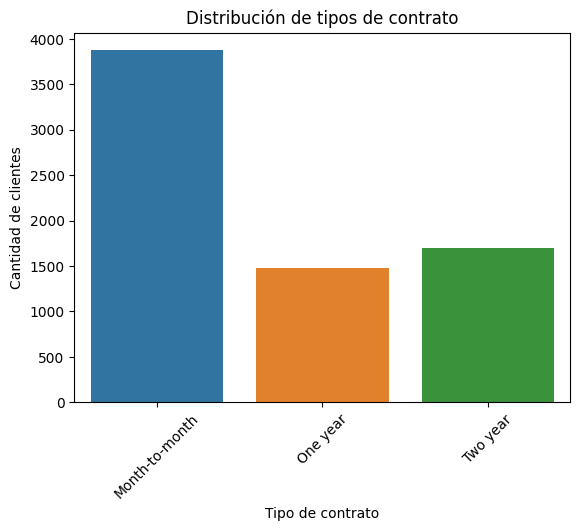

In [58]:
sns.countplot(data=contract, x='Type')
plt.title('Distribución de tipos de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.show()


**Métodos de pago**

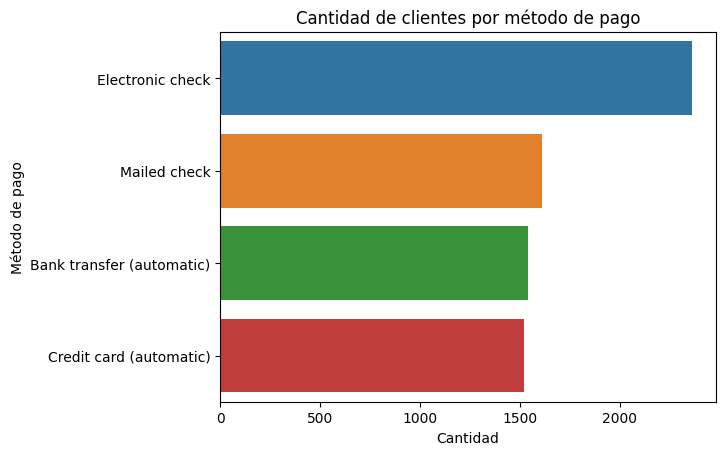

In [59]:
sns.countplot(data=contract, y='PaymentMethod', order=contract['PaymentMethod'].value_counts().index)
plt.title('Cantidad de clientes por método de pago')
plt.xlabel('Cantidad')
plt.ylabel('Método de pago')
plt.show()


**Servicios de internet**

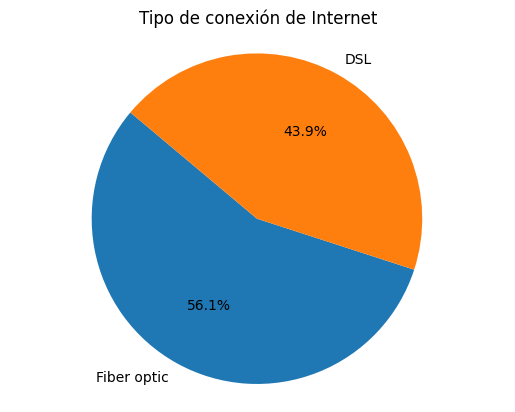

In [60]:
internet_service_counts = internet['InternetService'].value_counts()
plt.pie(internet_service_counts, labels=internet_service_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tipo de conexión de Internet')
plt.axis('equal')
plt.show()


## Preguntas aclaratorias

¿Qué áreas de la empresa Interconnect usará la información para darle el enfoque correcto al análisis? este cambia si es un área de marketing o finanzas.

¿Es únicamente predecir cancelaciones o también identificar causas y segmentos críticos?

¿Es necesario predecir si alguien cancelará en los próximos en cuantos días 30, 60, o 90?

¿Estamos interesados en retener a un tipo específico de cliente o es indistinto? o ¿Queremos aplicarlo para todos los clientes?

¿Hay clientes que no nos interesa retener?

¿Cómo mediremos el éxito del modelo: Accuracy, ROC-AUC, F1? ¿O se tiene carta abierta para medir?

¿Cuál es el valor máximo que podemos obtener en el ECM?

¿Prefieren una regresión logística o están abiertos a árboles, bosques, redes neuronales?

## Plan para resolver la tarea

A fin de predecir la tasa de cancelación de clientes y estar en condiciones de ofrecerles algunos beneficios especiales para evitar la cancelación del paquete contratado, de acuerdo a lo siguiente: 

* Sería importante hacer algunos cálculos con las fechas de los clientes que cancelaron el servicioa fin de identificar un patrón.
* Dividir los datos en conjunto de entrenamiento y prueba
* Hacer algunos modelos de árboles de decisión, random forest, XGBoost.
* Hacer una regresión logística si se desea explicación.
* Hacer ajuste de hiperparámetros para mejorar la sensibilidad de los modelos utilizados.
* Usar algunas métricas como  Recall, ROC-AUC, matriz de confución para detectar la mayoría de los clientes que podrían cancelar.
* Identificar los factores que están influyendo en la cancelación.
* Generar un reporte ejecutivo con los resultados obtenidos.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo desarrollando el plan de trabajo para tu proyecto Final!
    
Recuerda que debes tener un EDA claro con las gráficas y conclusiones adecuadas de cada una así cómo revisar por el balance de las clases a predecir y de ser necesario modifica los parámetros de los modelos para manejar el desbalance o aplica algún método de balanceo cómo oversample o undersample, también, procura evaluar las predicciones de tus modelos con el conjunto de prueba y de entrenamiento, si tienes un valor alto de tus métricas (f1-score, accuracy, etc) en el conjunto de entrenamiento pero bajo en el de prueba quiere decir que tu modelo se está sobre ajustando y debes modificar su entrenamiento para mitigar esto, te recomendaría tener cómo umbral un 0.75 de f1-score para saber si tu modelo es bueno con las predicciones, también puedes hacer una prueba de cordura con un DummyClassifier. Recuerda que debes revisar si el modelo a crear es de regresión o clasificación.
     
Saludos!
</div>